# **Übung 5: Rollgeschwindigkeit bei Variation der Streckung**

In [369]:
# Importieren von Python-Biblioteken
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, IntSlider, FloatSlider, fixed, VBox, HBox, Label
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objects as go
import ipywidgets as widgets

# Erhöhen der Plot-Auflösung
plt.rcParams["figure.dpi"] = 140

### 4.1.1 Visualisierung: Rechteckflügel mit Querrudern

In [370]:
def rechteckfluegel(AR, xi, l_i, l_a):
    """Generiert die Planform eines Rechteckflügels mit Rudern"""
    
    b = l_a * AR
    s = b / 2
    l_i = l_a

    # ruderbreite und -tiefe 
    y_ruder = 0.65 * s
    x_ruder = 0.8 * l_i
    rudertiefe = l_i - x_ruder
    
    # Flügelpunkte
    points_fluegel = np.array([
        [0, 0], [s, 0], [s, x_ruder], [y_ruder, x_ruder], 
        [y_ruder, l_a], [-y_ruder, l_a], [-y_ruder, x_ruder], [-s, x_ruder], [-s, 0], [0, 0]
    ])
    points_fluegel = [np.append(pt, 0) for pt in points_fluegel]
    
    # Ruderpunkte links
    ruder_links = np.array([
        [y_ruder, x_ruder, 0], [s, x_ruder, 0], 
        [s, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))], 
        [y_ruder, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))],
        [y_ruder, x_ruder, 0]
    ])
    
    # Ruderpunkte rechts
    ruder_rechts = np.array([
        [-y_ruder, x_ruder, 0], [-s, x_ruder, 0], 
        [-s, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))], 
        [-y_ruder, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))],
        [-y_ruder, x_ruder, 0]
    ])
    
    return points_fluegel, ruder_links, ruder_rechts

def plot_rechteckfluegel(AR, xi, l_i=1.0, l_a=1.0):
    """Plottet die Planform eines Rechteckflügels mit verstellbaren Rudern"""
    
    points_fluegel, ruder_links, ruder_rechts = rechteckfluegel(AR, xi, l_i, l_a)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Flügel plotten
    fluegel = Poly3DCollection([points_fluegel], color="black", alpha=0.6)
    ax.add_collection3d(fluegel)
    
    # Ruder links plotten
    ruder_l = Poly3DCollection([ruder_links], color="lightcoral", alpha=0.6)
    ax.add_collection3d(ruder_l)
    
    # Ruder rechts plotten
    ruder_r = Poly3DCollection([ruder_rechts], color="lightcoral", alpha=0.6)
    ax.add_collection3d(ruder_r)
    
    # Achsen skalieren und Label setzen
    ax.grid(False)

    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(elev=10, azim=30)
    plt.gca().set_aspect('equal')
    plt.show()

def widget_rechteckfluegel():
    """Erzeugt ein Widget, mit dem sich die Planform eines Rechteckflügels mit verstellbaren Rudern visualisieren lässt"""

    slider_AR = VBox([Label('Streckung'), FloatSlider(value=10, min=5, max=20, step=1)])
    slider_xi = VBox([Label('Klappenwinkel [°]'), FloatSlider(value=15, min=-15, max=40, step=1)])
    
    # Interaktiver plot
    ui = VBox([slider_AR,  slider_xi])
    out = widgets.interactive_output(plot_rechteckfluegel, {'AR': slider_AR.children[1], 'xi': slider_xi.children[1]
    })

    # Layout anpassen
    out.layout = widgets.Layout(flex='3 1 auto', width='70%')
    ui.layout = widgets.Layout(flex='1 1 auto', width='30%')
    return HBox([out, ui], layout=widgets.Layout(justify_content='center', align_items='center', width='100%'))

In [371]:
widget_rechteckfluegel()

### 4.1.2 Geometrische Parameter und Randbedinungen

In [372]:
# Konstant
alpha = 0                       # Anstellwinel [deg]
alpha = alpha / 180 * np.pi     # Anstellwinel [rad]  
U_inf = 10.0                    # Anströmgeschwindigkeit [m/s]
rho = 1.225                     # Dichte [kg/m^3]
l_i = 1.0                       # Flügeltiefe Rumpfmitte [m]
l_a = 1.0                       # Flügeltiefe außen [m]
l_r = 0.2                       # Rudertiefe [m]

#### 🟠

In [373]:
# Diese Parameter können verändert werden
AR = 10                         # Streckung/ Aspect Ratio
xi = 15                         # Klappenwinkel [deg]
omega = 1                       # dimensionslose Rollgeschwindigkeit

#### Berechnung weiterer geometrischer Parameter

In [374]:
# Berechnung der Halbspannweite
b = (l_i + l_a) * AR / 2
s = b / 2 

# Berechnung der Flügelfläche aus Halbspannweite und Flügeltiefen
S = b/2 * (l_a + l_i)       

# Verhältnis Rudertiefe-Flügeltiefe und spannweitige Position
lamda = l_r / l_i
y_ruder = 0.65 * s

# Berechnung des Nullanstellwinkels des Klappenprofils
xi = xi * np.pi / 180
alpha_0 = - 2 / np.pi * (np.asin(np.sqrt(lamda)) + np.sqrt(lamda * (1 - lamda))) * xi

# Berechnung der Breite eines Elementarflügels
N = 500
delta_b = b/ N

print("Halbspannweite:                          ", "%.2f" % s, "m")
print("Spannweitige Position der Ruder:         ", "%.2f" % y_ruder, "m")
print("Nullanstellwinkel des Klappenprofils:    ", str(round(alpha_0, 2)) + "°")

Halbspannweite:                           5.00 m
Spannweitige Position der Ruder:          3.25 m
Nullanstellwinkel des Klappenprofils:     -0.14°


### 4.1.4 Berechnung der Hufeisenwirbel-Koordinaten

In [375]:
def x_position(y, l_i, l_a, s, aufpunkt=False):
    """Berechnet die Tiefenposition der Punkte A und B und des Aufpunkts C"""

    tiefe = 0.75 if aufpunkt else 0.25
    return abs(y) / s * (l_i - l_a) / 2 + tiefe * (l_i - abs(y) / s * (l_i - l_a))


def compute_coords(s, N, delta_b, l_i, l_a):
    """Berechnet die Hufeisenwirbel-Koordinaten aus Basis der Flügelgeometrie und Anzahl der Elementarflügel"""

    # Spannweitige Positionen der Punkte A, B und Aufpunkt C
    y_a = np.array([-s +  j    * delta_b for j in range(N)])
    y_b = np.array([-s + (j+1) * delta_b for j in range(N)])
    y_c = np.array([-s + delta_b/2 + i*delta_b for i in range(N)])
    
    # Tiefenposition der Punkte A und B und des Aufpunkts C
    x_a = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_a])
    x_b = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_b])
    x_c = np.array([x_position(y_i, l_i, l_a, s, True) for y_i in y_c])

    # Spannweitige Positionen der bis ins Unendliche reichenden nichttragenden Wirbel
    y_aoo = np.array([-s +  j    * delta_b for j in range(N)])
    y_boo = np.array([-s + (j+1) * delta_b for j in range(N)])

    # Tiefenposition der bis ins Unendliche reichenden nichttragenden Wirbel
    x_aoo = x_a + 100*s
    x_boo = x_b + 100*s

    return y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo

# Berechnen aller Hufeisenwirbel-Koordinaten
y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s, N, delta_b, l_i, l_a)

In [376]:
def compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c):
    """Berechnet die drei Anteile der Koeffizientenmatrix"""
    
    # Initialisieren der Matrizen
    a_AB = np.zeros((x_a.size, x_a.size))
    a_Aoo = np.zeros((x_a.size, x_a.size))
    a_Boo = np.zeros((x_a.size, x_a.size))

    # Berechnen der Anteile der gebundenen Wirbel
    for j in range(N):
        for i in range(N):
            a_AB[i, j] = 1 / (4*np.pi) * (1/((x_c[i] - x_a[j])*(y_c[i] - y_b[j]) - (y_c[i] - y_a[j])*(x_c[i] - x_b[j]))) * (((x_b[j] - x_a[j])*(x_c[i] - x_a[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_a[j]))/ np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2) - ((x_b[j] - x_a[j])*(x_c[i] - x_b[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_b[j]))/ np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2))

    # Berechnen der Anteile der freien Wirbel der linken Seite
    for j in range(N):
        for i in range(N):
            a_Aoo[i, j] = 1 / (4*np.pi) * 1/(y_a[j] - y_c[i]) * ((x_c[i] - x_a[j])/ (np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2)) + 1)

    # Berechnen der Anteile der freien Wirbel der rechten Seite
    for j in range(N):
        for i in range(N):
            a_Boo[i, j] = 1 / (4*np.pi) * 1/(y_b[j] - y_c[i]) * ((x_c[i] - x_b[j])/ (np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2)) + 1)
    
    return a_AB, a_Aoo, a_Boo

In [377]:
# Berechnen der Anteile der Koeffizientenmatrix
a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)

a = a_AB + a_Aoo - a_Boo                # Koeffizientenmatrix
alpha_g = np.full((a.shape[0]), alpha)  # Anstellwinkelvektor
alpha_vec = np.full((a.shape[0]), alpha)

for i in range(alpha_vec.shape[0]):
    if y_c[i] < -y_ruder and y_c[i] < 0:
        alpha_vec[i] = alpha_g[i] + alpha_0
    else:
        alpha_vec[i] = alpha_g[i] - alpha_0

# dimensionslose Position der Aufpunkte
eta = y_c / s

# Löst das lineare Gleichungssystem Ax = b, wobei
# A - Koeffizientenmatrix a
# x - Zirkulationsvektor Gamma
# B - Koeffizientenvektor alpha_g * (- U_inf)
Gamma = np.linalg.solve(a, alpha_vec * (- U_inf)) 
Gamma_2 = np.linalg.solve(a, eta * omega * (- U_inf)) 

gamma = Gamma / 2 / s / U_inf
gamma_2 = Gamma / 2 / s / U_inf

In [378]:
A_i_ruder = rho * delta_b * U_inf * Gamma
A_ruder = np.sum(A_i_ruder)
A_i_rollen = rho * delta_b * U_inf * Gamma_2
A_rollen = np.sum(A_i_rollen)

C_A_ruder = 2*A_ruder / rho / U_inf**2 / S
C_A_rollen = 2*A_rollen / rho / U_inf**2 / S

rollmoment_ruder = np.sum(-y_c * A_i_ruder)
rollmoment = np.sum(-y_c * A_i_rollen)

C_L_ruder = 2*rollmoment_ruder / rho / U_inf**2 / S / s
C_L_rollen = 2*rollmoment / rho / U_inf**2 / S / s

omega_max = C_L_ruder / C_L_rollen
w_x = omega_max / s * U_inf * 180 / np.pi

print(omega_max)
print(w_x)

0.11271486244837502
12.916171813378993


## Aufgabe 3 b) Rollgeschwindigkeit bei Variation der Streckung

Untersuchen Sie die Rollgeschwindigkeit (dimensionslos und - behaftet) für einen Streckungsbereich  $\Lambda = [3, 100]$, für den maximalen Klappenausschlag $\xi=15^\circ$ bei $u_\infty=10 m/s$.

In [379]:
xi = 15                         # Klappenwinkel [deg]
omega = 1                       # dimensionslose Rollgeschwindigkeit

In [380]:
# Initialisieren der benötigten Variablen
AR_study = [3, 5, 10, 15, 20, 30, 50, 75, 100]
s = []
Omega_max = []
omega_x = []

# Iteration über verschiedene AR und l_a
for j, AR in enumerate(AR_study):
    # Berechnung der Halbspannweite, Fläche und Elementarflügelbreite
    b = (l_i + l_a) * AR / 2
    s.append(b / 2)
    S = b/2 * (l_a + l_i)  
    y_ruder = 0.65 * s[j]
    delta_b = b/N

    # Berechnen aller Hufeisenwirbel-Koordinaten
    y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s[j], N, delta_b, l_i, l_a) 

    # Berechnen der Anteile der Koeffizientenmatrix
    a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)
    
    # Berechnen der Zirkulation, Kräfte, Momente und schließlich der Rollgeschwindigkeit
    a = a_AB + a_Aoo - a_Boo                # Koeffizientenmatrix
    a_inv = np.linalg.inv(a)                 # ?
    alpha_g = np.full((a.shape[0]), alpha)  # Anstellwinkelvektor
    alpha_vec = np.full((a.shape[0]), alpha)

    for i in range(alpha_vec.shape[0]):
        if y_c[i] < -y_ruder and y_c[i] < 0:
            alpha_vec[i] = alpha_g[i] + alpha_0
        else:
            alpha_vec[i] = alpha_g[i] - alpha_0

    # dimensionslose Position der Aufpunkte
    eta = y_c / s[j]

    # Löst das lineare Gleichungssystem Ax = b, wobei
    # A - Koeffizientenmatrix a
    # x - Zirkulationsvektor Gamma
    # B - Koeffizientenvektor alpha_g * (- U_inf)
    Gamma = np.linalg.solve(a, alpha_vec * (- U_inf)) 
    Gamma_2 = np.linalg.solve(a, eta * omega * (- U_inf)) 

    gamma = Gamma / 2 / s[j] / U_inf
    gamma_2 = Gamma / 2 / s[j] / U_inf
    
    A_i_ruder = rho * delta_b * U_inf * Gamma
    A_ruder = np.sum(A_i_ruder)
    A_i_rollen = rho * delta_b * U_inf * Gamma_2
    A_rollen = np.sum(A_i_rollen)

    C_A_ruder = 2*A_ruder / rho / U_inf**2 / S
    C_A_rollen = 2*A_rollen / rho / U_inf**2 / S

    rollmoment_ruder = np.sum(-y_c * A_i_ruder)
    rollmoment = np.sum(-y_c * A_i_rollen)

    C_L_ruder = 2*rollmoment_ruder / rho / U_inf**2 / S / s[j]
    C_L_rollen = 2*rollmoment / rho / U_inf**2 / S / s[j]

    Omega_max.append(C_L_ruder / C_L_rollen)
    omega_x.append(Omega_max[j] / s[j] * U_inf * 180 / np.pi)

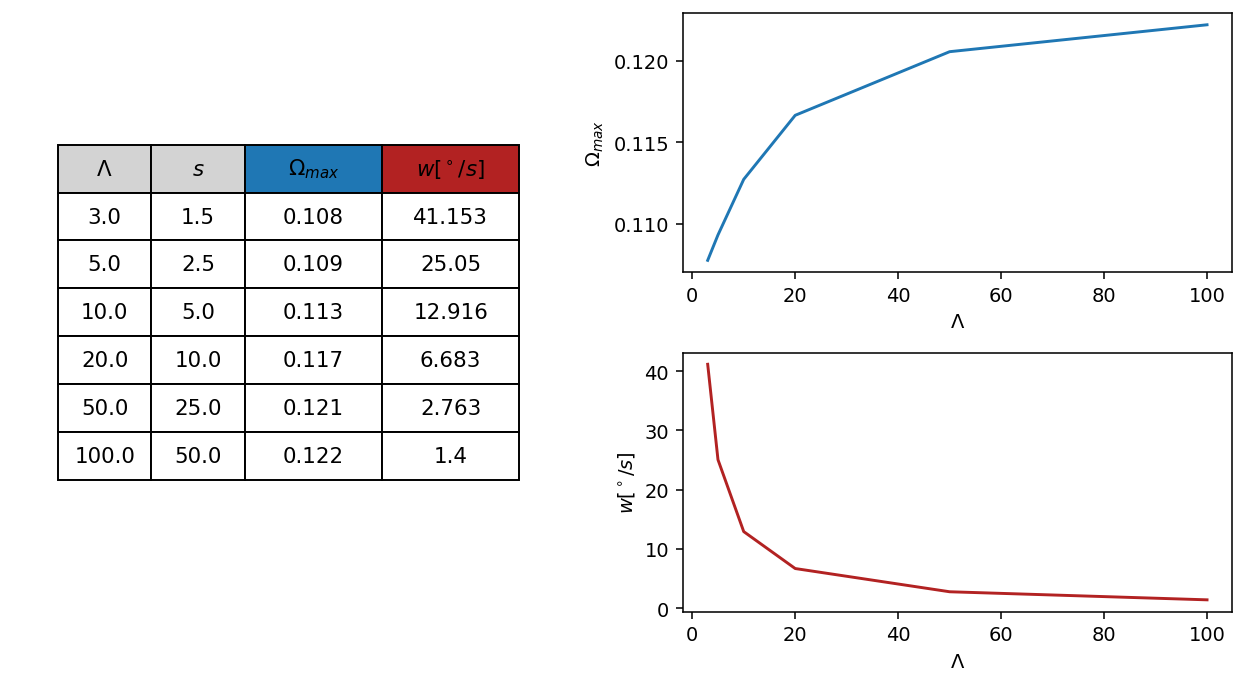

In [391]:
# Ergebnisse plotten
fig= plt.figure(figsize=(9, 5))
colColours = ["lightgray", "lightgray", "C0", "firebrick"]

# Hinzufügen von subplots um ein Layout zu erzeugen
ax1 = fig.add_subplot(1, 2, 1)  # oben link und unten links
ax2 = fig.add_subplot(2, 2, 2)  # oben rechts
ax3 = fig.add_subplot(2, 2, 4)  # unten rechts

# Die Achse für die Tabelle ausschalten
ax1.axis('off')

# Erstelle ein DataFrame
data = {
    r'$\Lambda$': AR_study,
    r'$s$': [round(num, 1) for num in s],
    r'$\Omega_{max}$': [round(num, 3) for num in Omega_max],
    r'$w[^\circ/s]$': [round(num, 3) for num in omega_x]
}
df = pd.DataFrame(data)

# Erstelle die Tabelle
ax1.axis('tight')
ax1.axis('off')
table = ax1.table(cellText=df.values, colLabels=df.columns, colColours=colColours, 
                    colWidths= [0.17, 0.17, 0.25, 0.25], cellLoc='center', loc='center')

# Zell-Eigenschaften anpassen
for key, cell in table.get_celld().items():
    cell.set_height(0.08)
    cell.set_fontsize(11)

# Plot für omega_max
ax2.plot(AR_study, Omega_max, linestyle='-', color=colColours[2])
ax2.set_xlabel(r"$\Lambda$")
ax2.set_ylabel(r'$\Omega_{max}$')

# Plot für w
ax3.plot(AR_study, omega_x, linestyle='-', color=colColours[3])
ax3.set_xlabel(r"$\Lambda$")
ax3.set_ylabel(r'$w[^\circ/s]$')

plt.tight_layout()
plt.show()